<a href="https://colab.research.google.com/github/tiendat-2k5/Vietnamese-License-Plate-Recognition-YOLOv5-EasyOCR-/blob/main/Trainning_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## <strong>DETECTION</strong>
</div>

Dowload </strong>YOLOv5</strong> to Google Colab

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

%cd /content

# Clone YOLOv5 repository từ GitHub
!git clone https://github.com/ultralytics/yolov5.git

%cd yolov5

# Cài đặt các thư viện cần thiết
!pip install -r requirements.txt

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17739, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 17739 (delta 57), reused 31 (delta 31), pack-reused 17643 (from 4)
Receiving objects: 100% (17739/17739), 17.16 MiB | 15.38 MiB/s, done.
Resolving deltas: 100% (12047/12047), done.
/content/yolov5


**Prepare DataSet**
<div>

We dowload the dataset to colab to prepare for training

In [ ]:
%cd '/content'
!pip install --upgrade gdown

!gdown --fuzzy 'https://drive.google.com/file/d/1IPXyyuYo_Mrz4ED5iapYlw4Z7a9DReDP/view?usp=sharing' -O dataset.zip
!unzip -l dataset.zip
!unzip dataset.zip -d dataset/

/content
Downloading...
From: https://drive.google.com/uc?id=1IPXyyuYo_Mrz4ED5iapYlw4Z7a9DReDP
To: /content/dataset.zip
100% 23.3M/23.3M [00:00<00:00, 294MB/s]
Archive:  dataset.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2025-11-17 18:47   license_plate/
        0  2025-11-17 18:47   license_plate/lincense_plate/
        0  2025-11-17 19:59   license_plate/lincense_plate/train/
        0  2025-11-17 18:47   license_plate/lincense_plate/train/images/
    17945  2025-10-19 13:15   license_plate/lincense_plate/train/images/0000_02187_b.jpg
    15882  2025-10-19 13:15   license_plate/lincense_plate/train/images/0000_05696_b.jpg
    15551  2025-10-19 13:15   license_plate/lincense_plate/train/images/0000_06886_b.jpg
    17503  2025-10-19 13:15   license_plate/lincense_plate/train/images/0001_05318_b.jpg
    18048  2025-10-19 13:15   license_plate/lincense_plate/train/images/0002_02183_b.jpg
    16879  2025-10-19 13:15   license_plate/lincense_plate/

Find the location and check dataset

In [ ]:
!ls '/content/dataset/license_plate/license_plate'

train  val


Create data.yaml

In [ ]:
# Create data.yaml file
%%writefile /content/yolov5/data.yaml
train: '/content/dataset/license_plate/license_plate/train/images'  # Đường dẫn đến ảnh train
val: '/content/dataset/license_plate/license_plate/val/images'      # Đường dẫn đến ảnh validation

nc: 1  # Số lượng class
names: ['license_plate']  # Tên các class

Writing /content/yolov5/data.yaml


Find the location of data.yaml

In [ ]:
!ls '/content/yolov5'

benchmarks.py	 data	    hubconf.py	    README.md	      train.py
CITATION.cff	 data.yaml  LICENSE	    README.zh-CN.md   tutorial.ipynb
classify	 detect.py  models	    requirements.txt  utils
CONTRIBUTING.md  export.py  pyproject.toml  segment	      val.py


Start to train

In [ ]:

%cd '/content/yolov5'
!python train.py --img 640 --batch 16 --epochs 600 --data '/content/yolov5/data.yaml' --weights yolov5s.pt --cache

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-11-17 20:59:47.025074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763413187.045919   24609 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763413187.052178   24609 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763413187.073301   24609 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763413187.073331   24609 computation_placer.cc:177] computation placer a

In [ ]:
!ls '/content/yolov5/runs/train'

exp


After finished training, we try on some pictures to check out is it enough to stop trainning or continue to do it

- If 1 photo, just upload 1
- If more, use Ctrl + Click to some pictures you choose

In [81]:
import os
from google.colab import files

# Tạo thư mục nếu chưa tồn tại
save_path = '/content/images'
os.makedirs(save_path, exist_ok=True)

# Chuyển vào thư mục đó
os.chdir(save_path)

# Upload file
uploaded = files.upload()

Saving image.jpg to image.jpg


Then detect the picture

In [91]:
%cd '/content/yolov5'

!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source '/content/images/*.*' --save-txt

/content/yolov5
detect: weights=['runs/train/exp/weights/best.pt'], source=/content/images/*.*, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-448-gdeec5e45 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/images/image.jpg: 480x640 1 license_plate, 32.2ms
Speed: 0.5ms pre-process, 32.2ms inference, 119.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


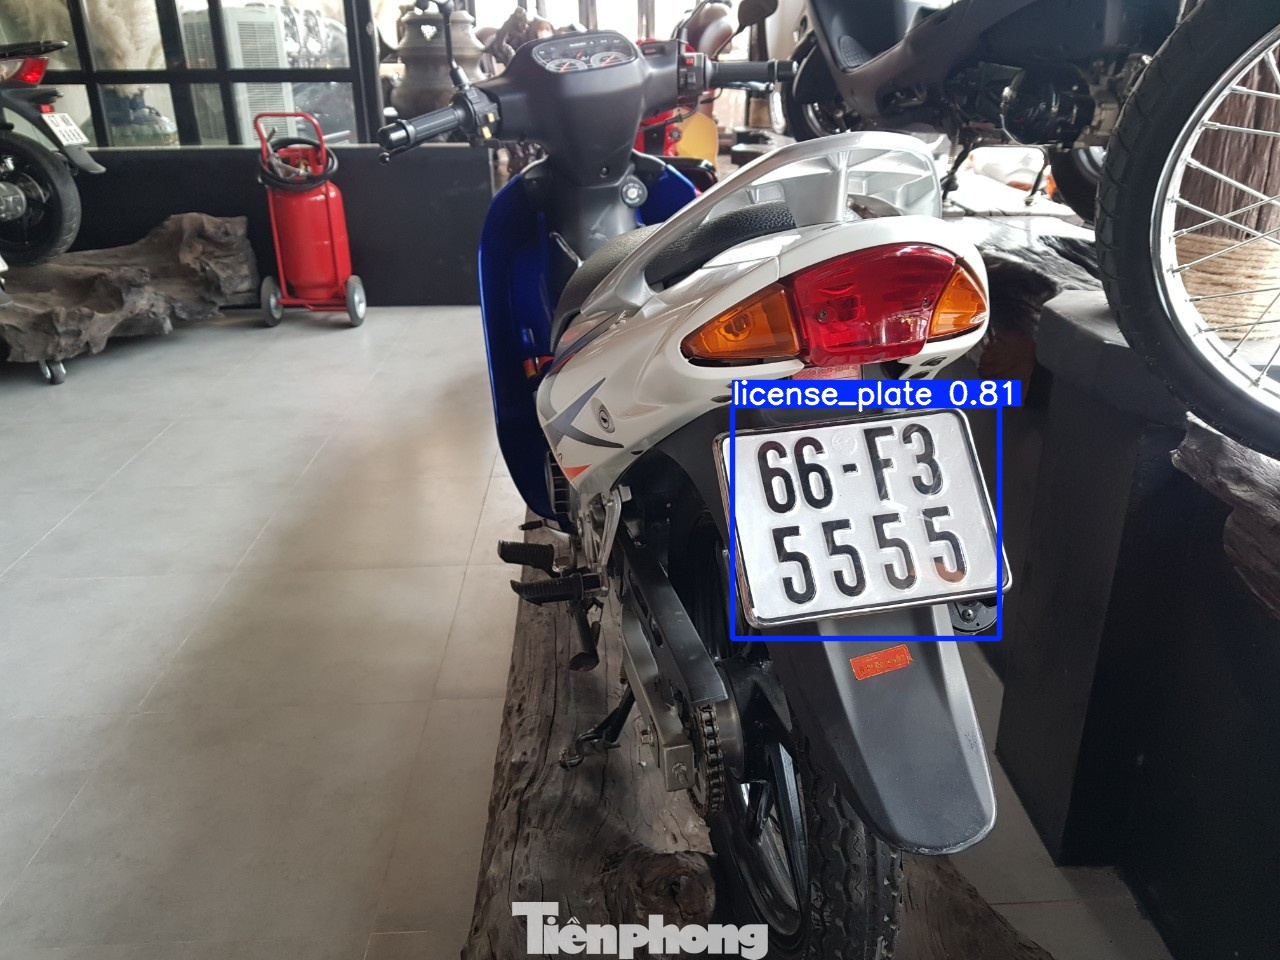

In [92]:
from IPython.display import Image, display
import os

result_dir = '/content/yolov5/runs/detect/exp/'  # Thư mục chứa kết quả
result_images = [f for f in os.listdir(result_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Hiển thị tất cả hình ảnh kết quả
for img_path in result_images:
    display(Image(os.path.join(result_dir, img_path)))

**READ**
<div>
Dowload EasOCR libraries and some others to prepare for project.

In [ ]:
!pip install easyocr
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 30.1 MB/s eta 0:00:00


This is the code to run OCR to detect and read the plate in picture

Find 1 image files. Starting processing...
-> Processing image: image.jpg
  + [image.jpg] License plate 1: 66-F3|5555


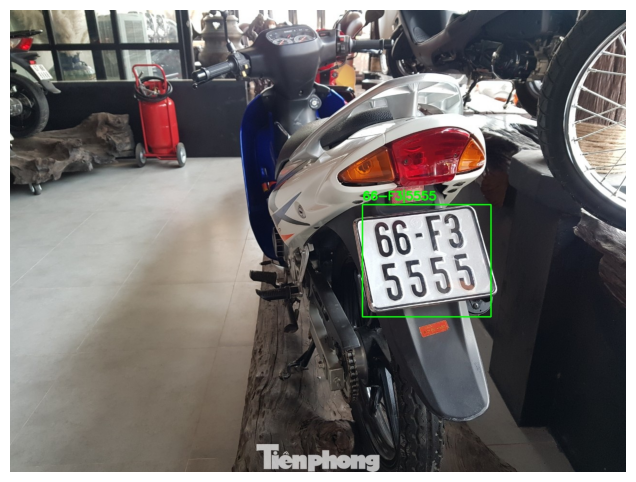


All images have been processed successfully!


In [93]:
import cv2
import os
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# ==== 1. Cấu hình thư mục ====
image_dir = "/content/images"
label_dir = "/content/yolov5/runs/detect/exp/labels/"
output_dir = "/content/yolov5/runs/detect/exp/results/"

os.makedirs(output_dir, exist_ok=True)

# ==== 2. Khởi tạo EasyOCR reader (CHỈ MỘT LẦN) ====
reader = easyocr.Reader(['en'], gpu=True)

# ==== 3. Lặp qua tất cả các file ảnh ====
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(f"Find {len(image_files)} image files. Starting processing...")

plate_index = 1  # Biến đếm toàn cục cho tất cả ảnh

for filename in image_files:
    image_path = os.path.join(image_dir, filename)

    # Suy ra file label tương ứng
    base_name, _ = os.path.splitext(filename)
    label_filename = base_name + ".txt"
    label_path = os.path.join(label_dir, label_filename)

    # Kiểm tra file label
    if not os.path.exists(label_path):
        print(f"(!) Skipped: Label file '{label_filename}' not found for image '{filename}'")
        continue

    image = cv2.imread(image_path)
    if image is None:
        print(f"(!) Skipped: Cannot read image '{filename}'")
        continue

    print(f"-> Processing image: {filename}")
    output_image = image.copy()
    h, w, _ = image.shape

    with open(label_path, "r") as f:
        lines = f.readlines()

    for line in lines:
        try:
            cls, x_center, y_center, width, height = map(float, line.strip().split())

            x_center *= w
            y_center *= h
            width *= w
            height *= h

            x1 = max(0, int(x_center - width / 2))
            y1 = max(0, int(y_center - height / 2))
            x2 = min(w, int(x_center + width / 2))
            y2 = min(h, int(y_center + height / 2))

            cropped_plate = image[y1:y2, x1:x2]
            if cropped_plate.shape[0] < 10 or cropped_plate.shape[1] < 10:
                continue

            # Nhận diện ký tự (OCR)
            result = reader.readtext(cropped_plate)

            plate_text = ""
            if result:
                # Sắp xếp theo trục Y (vị trí dòng trên ảnh)
                result.sort(key=lambda x: np.mean([p[1] for p in x[0]]))

                # Gom nhóm theo từng dòng (dựa trên khoảng cách tọa độ Y)
                lines = []
                current_line = [result[0]]
                for r in result[1:]:
                  y_mean = np.mean([p[1] for p in r[0]])
                  last_y_mean = np.mean([p[1] for p in current_line[-1][0]])
                  if abs(y_mean - last_y_mean) > 15:  # nếu khác dòng
                    lines.append(current_line)
                    current_line = [r]
                  else:
                    current_line.append(r)
                lines.append(current_line)

                # Ghép các ký tự trong từng dòng
                text_lines = []
                for line in lines:
                  line_text = " ".join([res[1] for res in line])
                  text_lines.append(line_text.strip())

                # Dùng dấu " | " để phân cách các dòng
                plate_text = " | ".join(text_lines).upper().replace(" ", "")

            # In kết quả có thứ tự liên tục và tên ảnh
            print(f"  + [{filename}] License plate {plate_index}: {plate_text}")
            plate_index += 1

            # Vẽ bounding box và ghi kết quả OCR lên ảnh
            cv2.rectangle(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            text_position = (x1, y1 - 10 if y1 - 10 > 10 else y1 + 20)
            cv2.putText(
                output_image, plate_text, text_position,
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA
            )

        except Exception as e:
            print(f"  (!) Error while processing bounding box: {e}")

    # ---- Lưu ảnh kết quả ----
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, output_image)

# ==== 4. Hiển thị ảnh kết quả ====
for filename in os.listdir(output_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(output_dir, filename)
        img = cv2.imread(img_path)
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

print("\nAll images have been processed successfully!")


After runs finish, if you want to change anything you can check the list behind

Run from begining again, delete yolov5 and dataset

In [ ]:
 !rm -rf '/content/yolov5'

 !rm -rf '/content/dataset'
 !rm -rf '/content/dataset.zip'
 !rm -rf '/content/images'

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


Train a new dataset, delete dataset and runs in yolov5

In [ ]:
# !rm -rf '/content/yolov5/runs'

# !rm -rf '/content/yolov5/dataset'
# !rm -rf '/content/yolov5/dataset.zip'

Run the new detect again, delete last detect result in runs


In [90]:
 !rm -rf '/content/yolov5/runs/detect'

Try a new images

In [ ]:
# !rm -rf '/content/images'